In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_datasets/RW10.csv')
df_ref = df[df['capacity (Ah)'].notnull()]

# %matplotlib inline
# fig = px.scatter(df_ref, x='cycle', y=[0 for i in range(len(df_ref))])
# fig.update_traces(hovertemplate='Cycle: %{x}')
# fig.update_yaxes(visible=False)
# fig.show()

In [3]:
df_ref = df_ref.reset_index(drop=True)
train_percentage = 0.99
ref_index = round(train_percentage * df_ref.shape[0])
cycle_cuttoff = df_ref.iloc[ref_index].cycle

train_df = df.set_index('cycle').loc[:cycle_cuttoff].reset_index()
test_df = df.set_index('cycle').loc[cycle_cuttoff:].reset_index()

%matplotlib inline
train_fig = px.scatter(
    train_df.query('gt==True'), 
    x='cycle', 
    y=[0 for i in range(len(train_df.query('gt==True')))],
    color_discrete_sequence=['green'],
)

test_fig = px.scatter(
    test_df.query('gt==True'),
    x='cycle',
    y=[0 for i in range(len(test_df.query('gt==True')))],
    color_discrete_sequence=['red'],
)

# fig = train_fig.add_traces(test_fig.data)
# fig.update_traces(hovertemplate='Cycle: %{x}')
# fig.update_yaxes(visible=False)
# fig.show()


In [4]:
df = pd.read_csv('processed_datasets/RW10.csv')
df_ref = df[df['capacity (Ah)'].notnull()]

# df['capacity (Ah)'] = df.set_index('endTime')['capacity (Ah)'].interpolate(method='akima').reset_index().dropna()['capacity (Ah)']

# %matplotlib widget
# sns.set(rc={"figure.figsize":(14, 6)}) 
# plt.rcParams['lines.linewidth'] = 1

# sns.set_style('darkgrid')
# sns.lineplot(data=df, y='capacity (Ah)', x='endTime')
# sns.scatterplot(data=df, y='capacity (Ah)', x='endTime', hue='gt', style='gt', markers=['P', 'o'], s=50)
# plt.show()

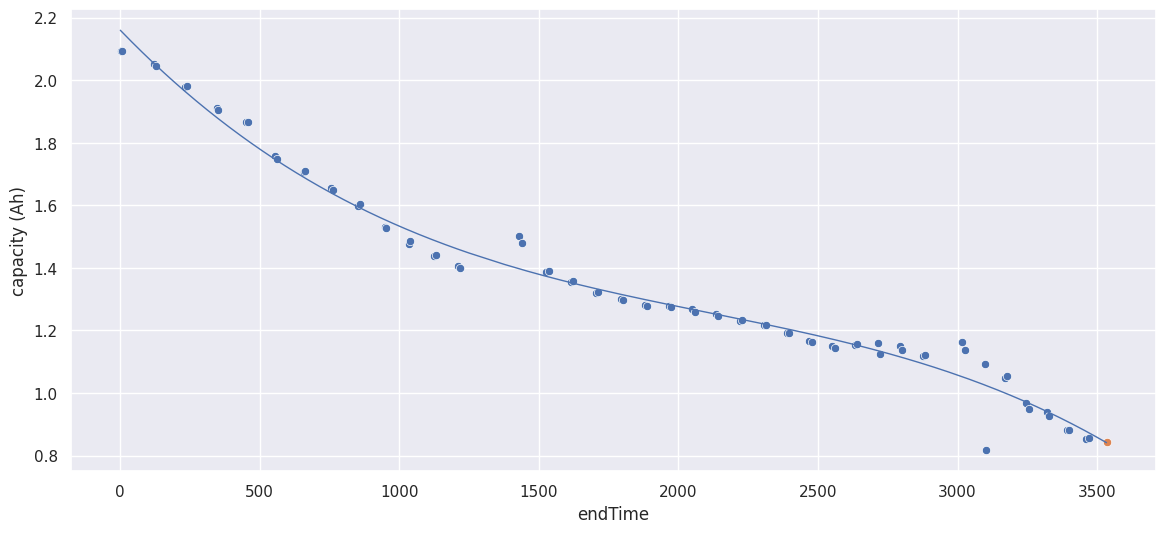

In [127]:
import numpy as np

X_train, y_train = train_df.query('gt==True')[['endTime', 'capacity (Ah)']].values.T
# X_train, y_train = X_train.reshape(-1, 1), y_train.reshape(-1, 1)

# model = Lasso(alpha = 0.5, random_state = 42)
# model.fit(X_train, y_train)

model = np.poly1d(
    np.polyfit(X_train, y_train, 3)
    )


X_test = df.query('gt==False')['endTime'].values
y_pred = model(X_test)
y_pred = np.array(y_pred).flatten()
X_test = np.array(X_test).flatten()

sns.lineplot(y=y_pred, 
             x=X_test
             )

sns.scatterplot(
                data=train_df.query('gt==True'),
                y='capacity (Ah)', 
                x='endTime',
                )

sns.scatterplot(
                data=test_df.query('gt==True'),
                y='capacity (Ah)', 
                x='endTime',
                )


plt.show()